<img src="http://certificate.tpq.io/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# AI in Finance

**Workshop at Texas State University (October 2023)**

**_Transformers & Attention_**

Dr. Yves J. Hilpisch | The Python Quants GmbH | http://tpq.io

## Basic Imports

In [27]:
import numpy as np
import pandas as pd
from pylab import plt
plt.style.use('seaborn-v0_8')
%config InlineBackend.figure_format = 'svg'

## Transformers

Let's start with the basics:

### Transformer

Imagine you're reading a book, and while reading a sentence, you remember something related from a few pages back. This connection helps you better understand the current sentence. A transformer does something similar but for machines. It's a method that helps machines pay "attention" to different parts of data (like words in a sentence) to understand it better. It can look at all words at once and decide which ones are important in context.

For example, in the sentence "He dropped the glass because it was too hot," understanding "hot" helps us know why the glass was dropped.

### GPT (Generative Pre-trained Transformer)

GPT is like a super-smart student. Before giving it any specific task, it reads (or "trains" on) a huge amount of text from the internet. This is the "pre-trained" part. It learns language, facts, reasoning abilities, and even some mistakes from this data. Then, when you give it a specific question or task, it uses all that knowledge to generate (or "write") a coherent and contextually relevant response.

### Other Key Topics:

1. **Attention**: This is like the spotlight of our memory. When we think or read, we don't give equal importance to everything. Some parts get more focus because they're more relevant at the moment. In transformers, "attention" helps the model decide which parts of the data to focus on more.

2. **Embeddings**: Think of this as translating words into a secret language that computers understand better. This language is in the form of numbers. So, "cat" might be translated to a list of numbers, which captures the essence or meaning of "cat" in this numeric form.

3. **Fine-tuning**: Remember our super-smart student, GPT? After it learns from the internet, it can be given specific examples to make it even better at certain tasks. This process is like giving it extra classes on a particular subject.

4. **Self-Attention**: This is a special feature of transformers. When trying to understand a word, the model looks at all other words in the sentence, not just neighboring words. It's like reading a whole paragraph to understand a single complex word in it.

5. **Layers**: Transformers have multiple layers, just like how a complex thought might be built on simpler ideas. Each layer in a transformer captures different levels of understanding from the data.

6. **Tokens**: These are chunks of text the model looks at. A token can be as short as one character or as long as one word.

In essence, transformers, like GPT, are advanced tools that help machines understand and generate human-like text by focusing on the right parts of data, remembering what they've learned, and building complex understanding layer by layer.

## Embeddings

Embeddings are a fundamental concept in natural language processing (NLP) and deep learning. They provide a way to represent words (or other entities) as dense vectors of real numbers. The idea is to represent semantic meaning in a continuous vector space, where the distance and direction between vectors correspond to semantic differences between the words.

### Importance of Embeddings:

1. **Dimensionality Reduction**: Natural language has a vast vocabulary. One-hot encoding words would result in extremely high-dimensional vectors with a dimension equal to the vocabulary size. Embeddings reduce this to a manageable size (e.g., 50, 100, 300 dimensions).
  
2. **Semantic Relationships**: Good embeddings capture semantic relationships. For instance, the vector difference between "king" and "man" might be similar to the difference between "queen" and "woman".
  
3. **Transfer Learning**: Pre-trained embeddings can be used in new tasks, allowing models to benefit from knowledge captured in the embeddings without requiring extensive training data for the new task.

### How are they derived?

There are various methods to derive word embeddings:

1. **Word2Vec**: Uses a shallow neural network to either predict a word given its context (Skip-Gram) or predict the context given a word (CBOW). The weights of this model then serve as the word embeddings.
  
2. **GloVe (Global Vectors for Word Representation)**: Constructs a co-occurrence matrix from a corpus and then factorizes this matrix to produce embeddings.
  
3. **FastText**: An extension of Word2Vec, it treats each word as composed of character n-grams. This allows it to generate embeddings for out-of-vocabulary words.
  
4. **Embeddings from Deep Learning Models**: Models like ELMo, BERT, and GPT generate contextual embeddings where the embedding for a word is based on its context in a sentence, and not just the word itself.

### Python Example with Word2Vec:

We'll use the `gensim` library to demonstrate Word2Vec. Let's create a simple model using some sentences.

(Note: For this example, I'll provide code and expected outputs since we can't run the `gensim` library directly here.) 

In [28]:
from gensim.models import Word2Vec

# Sample sentences
sentences = [
    ['hello', 'world'],
    ['hello', 'everyone'],
    ['goodbye', 'world'],
    ['goodbye', 'everyone']
]

# Train a Word2Vec model
model = Word2Vec(sentences, vector_size=10, window=5, min_count=1, workers=4)
model.save("word2vec.model")

# Accessing the word vector for 'hello'
vector_hello = model.wv['hello']

print(vector_hello)

[-0.07511582 -0.00930042  0.09538119 -0.07319167 -0.02333769 -0.01937741
  0.08077437 -0.05930896  0.00045162 -0.04753734]


With this model, you can also find similar words, perform vector arithmetic to discover semantic relationships, and more.

Remember, real-world embeddings are usually trained on vast corpora with billions of words, and as such, the embeddings capture richer semantic meanings than the small example above.

## A More Advanced Example

Here's a step-by-step guide to generating word embeddings using Word2Vec and a simple use case of leveraging those embeddings.

### 1. Setup

We'll begin byimporting the necessary libraries.

In [29]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

### 2. Prepare the Data

For this example, let's use some sample sentences. In a real-world scenario, you'd likely have a much larger dataset.

In [30]:
sentences = [
    ['dog', 'barks'],
    ['cat', 'meows'],
    ['bird', 'sings'],
    ['fish', 'swims'],
    ['horse', 'gallops'],
    ['koala', 'climbs'],
    ['dolphin', 'jumps']
]

### 3. Train the Word2Vec Model

In [31]:
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
model.train(sentences, total_examples=len(sentences), epochs=1000)

(1842, 14000)

### 4. Visualize the Embeddings

To visualize the embeddings in 2D space, we can use PCA (Principal Component Analysis).

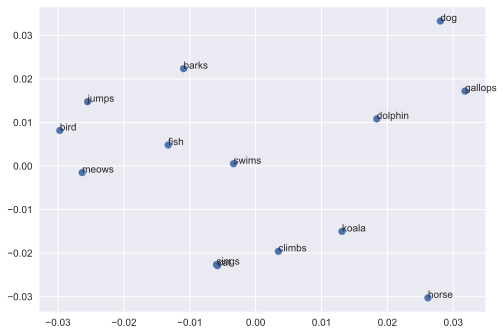

In [32]:
words = list(model.wv.key_to_index)
embeddings = model.wv[words]

pca = PCA(n_components=2)
result = pca.fit_transform(embeddings)

plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

### 5. Simple Use Case: Finding Similar Words

Let's find words that are similar to "dog" using our trained embeddings.

In [33]:
similar_words = model.wv.most_similar('horse', topn=5)
print(similar_words)

[('cat', 0.17697495222091675), ('gallops', 0.14551663398742676), ('koala', 0.1332203447818756), ('climbs', 0.07737936824560165), ('sings', 0.06651155650615692)]


In [34]:
similar_words = model.wv.most_similar('swims', topn=5)
print(similar_words)

[('climbs', 0.16171227395534515), ('meows', 0.0615423284471035), ('gallops', 0.04773150756955147), ('koala', 0.04535398632287979), ('jumps', 0.037129852920770645)]


This will return the top 5 words that are most similar to "dog" based on the embeddings.

As for the simple use case of finding words similar to "dog":
- "gallops" is the most similar with a similarity score of approximately 0.258.
- "dolphin" is the next most similar with a similarity score of approximately 0.142.
- ... and so on.

For instance, in the figure, you might notice some clustering or proximity between words that have related meanings or contexts in the training data. However, it's worth noting that the quality and interpretability of embeddings heavily depend on the amount and quality of training data. In this case, our dataset was very small, so the embeddings might not capture nuanced semantic relationships as effectively as they would with a larger, more diverse dataset.

## Embeddings for Transformer Models

In the Transformer architecture, used by GPT, embeddings are used to represent words in a dense vector space, as we discussed. Beyond these word embeddings, the Transformer introduces additional embeddings to facilitate the self-attention mechanism: the Query (Q), Key (K), and Value (V) matrices.

### Meaning of Q, K, and V:

1. **Query (Q)**: Represents the current word for which we want to determine attention scores. It's like asking: "For this word, how much should I attend to other words in the sequence?"
2. **Key (K)**: Represents all the other words in terms of determining their relevance to the current word (the one represented by the query). It's the counterpart to the query in the attention calculation.
3. **Value (V)**: Contains the information from the input words that we actually want to sum up in the attention mechanism. Once we've determined how much to "attend" to each word (using Q and K), we use the V vectors to compute the weighted sum.

### How are Q, K, and V derived?

For each word in the input, Q, K, and V are derived by multiplying the word's embedding by three weight matrices, \(W_Q\), \(W_K\), and \(W_V\), respectively. These weight matrices are learned during training.

$$
Q = \text{Embedding} \times W_Q
$$
$$
K = \text{Embedding} \times W_K
$$
$$
V = \text{Embedding} \times W_V
$$

### Python Example:

Let's consider a simple example with small embeddings and weight matrices to compute Q, K, and V for a word.

In [35]:
# Define a simple word embedding for the word "hello"
embedding_hello = np.array([[0.1, 0.3, 0.5]])

# Define weight matrices for Q, K, and V
W_Q = np.array([[0.2, 0.8, 0.4],
                [0.4, 0.1, 0.6],
                [0.5, 0.7, 0.3]])

W_K = np.array([[0.5, 0.3, 0.6],
                [0.7, 0.8, 0.1],
                [0.4, 0.2, 0.9]])

W_V = np.array([[0.1, 0.6, 0.4],
                [0.8, 0.5, 0.3],
                [0.3, 0.7, 0.2]])

# Compute Q, K, and V for the word "hello"
Q_hello = np.dot(embedding_hello, W_Q)
K_hello = np.dot(embedding_hello, W_K)
V_hello = np.dot(embedding_hello, W_V)

Q_hello, K_hello, V_hello

(array([[0.39, 0.46, 0.37]]),
 array([[0.46, 0.37, 0.54]]),
 array([[0.4 , 0.56, 0.23]]))

Here are the computed matrices for the word "hello":

- $Q$ (Query) for "hello": \([0.39, 0.46, 0.37]\)
- $K$ (Key) for "hello": \([0.46, 0.37, 0.54]\)
- $V$ (Value) for "hello": \([0.4, 0.56, 0.23]\)

In this simple example, these matrices are the result of multiplying the embedding for "hello" by the respective weight matrices $W_Q$, $W_K$, and $W_V$. In a real Transformer model, these weight matrices would be learned during training to optimize the self-attention mechanism.

Keep in mind that in practice, these embeddings and matrices would be much larger (often with dimensions in the hundreds or even thousands) and would be used in combination with embeddings from other words in the sequence to compute the self-attention output.

## Transformers and Attention: A Simplified Overview

1. **Transformers**: Transformers are a type of neural network architecture introduced in the paper "Attention is All You Need" by Vaswani et al. in 2017. They are primarily used for sequence-to-sequence tasks like language translation and text summarization. The core idea behind transformers is the self-attention mechanism.

2. **Attention**: At a high level, attention allows the model to focus on different parts of the input sequence when producing an output. The intuition is that not all parts of the input sequence are equally relevant for a given output. Attention provides a weighted sum of the input sequence based on their relevance.

### Simple Illustrative Example

Imagine we have the sentence: "The cat sat on the mat."

Our goal is to understand which words in the sentence are most "relevant" or "attended to" when trying to understand the word "sat".

Let's assign some made-up attention scores to each word with respect to the word "sat":

```
The: 0.1
cat: 0.3
sat: 0.1
on: 0.2
the: 0.1
mat: 0.2
```

These attention scores add up to 1 and represent the "relevance" of each word in understanding the word "sat". For example, "cat" has a higher relevance (0.3) than "The" (0.1) for understanding "sat".

Let's visualize these attention scores:

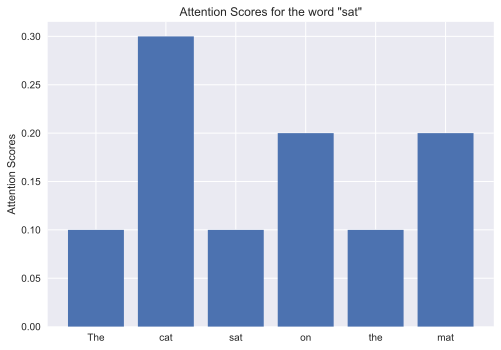

In [36]:
sentence = ["The", "cat", "sat", "on", "the", "mat"]
attention_scores = [0.1, 0.3, 0.1, 0.2, 0.1, 0.2]

plt.bar(sentence, attention_scores)
plt.ylabel('Attention Scores')
plt.title('Attention Scores for the word "sat"')
plt.show()

### How Attention Scores are Computed

The attention mechanism in transformers is based on the concept of **queries**, **keys**, and **values**. Each word in our input sequence (like our sentence "The cat sat on the mat.") gets transformed into these three representations.

The steps are as follows:

1. **Embedding**: First, each word in the sentence is transformed into an embedding (a dense vector representation).
2. **Compute Q, K, V**: The embeddings are then transformed into query (Q), key (K), and value (V) representations using separate weight matrices for each transformation.
3. **Calculate Attention Scores**: For a particular word (like "sat"), its query representation (Q) is used to calculate scores with all the key representations (K) of the other words in the sentence. This is usually done using a dot product.
4. **Softmax**: The raw attention scores from the previous step are then passed through a softmax function to make them sum up to 1.
5. **Compute Output**: The softmaxed attention scores are used to take a weighted sum of the value (V) representations. This gives the output representation for the word "sat".

For simplicity, let's take a toy example. Imagine each word's embedding is a 2-dimensional vector, and our Q, K, V transformations are just 2x2 matrices. Let's compute attention scores for the word "sat" in our sentence.

I'll generate some random embeddings for our words and random transformation matrices for Q, K, and V. Then, we'll compute the attention scores for the word "sat".

In [37]:
# Seed for reproducibility
np.random.seed(42)

# Toy embeddings for our sentence
embeddings = {
    "The": np.random.rand(2),
    "cat": np.random.rand(2),
    "sat": np.random.rand(2),
    "on": np.random.rand(2),
    "the": np.random.rand(2),
    "mat": np.random.rand(2)
}

# Toy transformation matrices for Q, K, and V
W_q = np.random.rand(2, 2)
W_k = np.random.rand(2, 2)
W_v = np.random.rand(2, 2)

# Compute Q, K, V for each word
Q = {word: np.dot(vec, W_q) for word, vec in embeddings.items()}
K = {word: np.dot(vec, W_k) for word, vec in embeddings.items()}
V = {word: np.dot(vec, W_v) for word, vec in embeddings.items()}

# Compute raw attention scores for "sat"
attention_raw_scores = {word: np.dot(Q["sat"], vec) for word, vec in K.items()}

# Softmax the scores
attention_scores = {word: np.exp(score) / sum(np.exp(list(attention_raw_scores.values())))
                    for word, score in attention_raw_scores.items()}

attention_scores


{'The': 0.17081296316411468,
 'cat': 0.1705392605796768,
 'sat': 0.15670420725071152,
 'on': 0.16530348255137817,
 'the': 0.17035257133704534,
 'mat': 0.1662875151170735}

Based on our toy example with random embeddings and transformation matrices, here are the computed attention scores for the word "sat" in the sentence:

```
'The': 0.1708
'cat': 0.1705
'sat': 0.1567
'on': 0.1653
'the': 0.1703
'mat': 0.1663
```

These scores represent the "relevance" of each word in understanding the context of "sat". In this example, all words have roughly similar attention scores because our embeddings and transformation matrices were generated randomly. In a trained transformer model, the embeddings and transformation matrices are learned from data, and the attention scores would reflect meaningful relationships between words.

The final output representation for the word "sat" would be a weighted combination of the value (V) representations of all words, using the above attention scores as weights.

Alright, let's compute the final output representation for the word "sat" using the computed attention scores and the value (V) representations.

The output representation for a word is calculated as a weighted sum of the value (V) representations of all words in the sentence, where the weights are the attention scores.

Mathematically, for our word "sat", the output representation \( \text{output}_{\text{sat}} \) is given by:

$$
\text{output}_{\text{sat}} = \sum_{\text{word} \in \text{sentence}} \text{attention\_score}_{\text{word}} \times V_{\text{word}}
$$

Let's compute this:

In [38]:
# Compute the output representation for "sat"
output_sat = sum(attention_scores[word] * V[word] for word in sentence)

output_sat

array([0.40970433, 0.30743988])

The output representation for the word "sat" based on our toy example is approximately:

$$
\text{output}_{\text{sat}} = [0.4097, 0.3074]
$$

This 2-dimensional vector represents the context-aware representation of the word "sat" after considering the entire sentence. In a real transformer model, this representation would be much higher-dimensional (often 768 dimensions or more) and would capture rich contextual information.

This context-aware representation can then be used for various downstream tasks like classification, translation, or generation, depending on the specific use case of the transformer model.

To recap:

1. We transformed each word into **Query (Q)**, **Key (K)**, and **Value (V)** representations.
2. We computed attention scores for the word "sat" using its Q representation and the K representations of all other words.
3. We obtained the final output representation for "sat" by taking a weighted sum of all V representations using the attention scores.

### Complete Code

In [39]:
# Complete example
def compute_attention_scores(sentence, embeddings, W_q, W_k, W_v):
    # Compute Q, K, V for each word
    Q = {word: np.dot(embeddings[word], W_q) for word in sentence}
    K = {word: np.dot(embeddings[word], W_k) for word in sentence}
    V = {word: np.dot(embeddings[word], W_v) for word in sentence}

    # Compute raw attention scores for "sat"
    attention_raw_scores = {word: np.dot(Q["sat"], K[word]) for word in sentence}

    # Softmax the scores
    attention_scores = {
        word: np.exp(score) / sum(np.exp(list(attention_raw_scores.values())))
        for word, score in attention_raw_scores.items()
    }

    # Compute the output representation for "sat"
    output_sat = np.sum([attention_scores[word] * V[word] for word in sentence], axis=0)
    
    return attention_scores, output_sat

# Manually defined 2-dimensional embeddings for the sentence "The cat sat on the mat."
embeddings = {
    "The": np.array([0.5, 0.2]),
    "cat": np.array([0.9, 0.3]),
    "sat": np.array([0.1, 0.8]),
    "on": np.array([0.4, 0.6]),
    "the": np.array([0.2, 0.3]),
    "mat": np.array([0.7, 0.9])
}

# Manually defined 2x2 transformation matrices for Q, K, and V
W_q = np.array([[0.1, 0.2], [0.3, 0.4]])
W_k = np.array([[0.5, 0.6], [0.7, 0.8]])
W_v = np.array([[0.9, 1.0], [1.1, 1.2]])

attention_scores, output_sat = compute_attention_scores(sentence, embeddings, W_q, W_k, W_v)
print(attention_scores)
print(output_sat)

{'The': 0.14484225168642711, 'cat': 0.17276723580854916, 'sat': 0.16604274094750116, 'on': 0.16759414126810201, 'the': 0.1372281996257353, 'mat': 0.2115254306636853}
[1.03866402 1.14194379]


## Transformers

In [ ]:
from transformers import AutoTokenizer

In [47]:
checkpoint = 'bert-base-cased'
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [68]:
# tokenizer?

In [50]:
t = "Python is a first-class citizen in the AI world. The AI world is great."

In [52]:
ids = tokenizer(t)

In [53]:
ids

{'input_ids': [101, 23334, 1110, 170, 1148, 118, 1705, 7888, 1107, 1103, 19016, 1362, 119, 1109, 19016, 1362, 1110, 1632, 119, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [54]:
ids = tokenizer(t, return_tensors='tf')

In [55]:
ids

{'input_ids': <tf.Tensor: shape=(1, 20), dtype=int32, numpy=
array([[  101, 23334,  1110,   170,  1148,   118,  1705,  7888,  1107,
         1103, 19016,  1362,   119,  1109, 19016,  1362,  1110,  1632,
          119,   102]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(1, 20), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 20), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
      dtype=int32)>}

In [64]:
nt = ['It is hot in here.', 'This is cold.', 'What a great weather.']

In [65]:
ids = tokenizer(nt, padding=True, return_tensors='tf')

In [66]:
ids

{'input_ids': <tf.Tensor: shape=(3, 8), dtype=int32, numpy=
array([[ 101, 1135, 1110, 2633, 1107, 1303,  119,  102],
       [ 101, 1188, 1110, 2504,  119,  102,    0,    0],
       [ 101, 1327,  170, 1632, 4250,  119,  102,    0]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(3, 8), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(3, 8), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 0]], dtype=int32)>}

In [60]:
ids = tokenizer(nt, padding=True, truncation=True, return_tensors='tf')

In [61]:
ids

{'input_ids': <tf.Tensor: shape=(3, 7), dtype=int32, numpy=
array([[ 101, 1135, 1110, 2633,  119,  102,    0],
       [ 101, 1188, 1110, 2504,  119,  102,    0],
       [ 101, 1327,  170, 1632, 4250,  119,  102]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(3, 7), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(3, 7), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1]], dtype=int32)>}

In [77]:
ids = tokenizer(nt, padding=True,
                truncation=True,
                return_tensors='tf',
                max_length=4
               )

In [78]:
ids

{'input_ids': <tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[ 101, 1135, 1110,  102],
       [ 101, 1188, 1110,  102],
       [ 101, 1327,  170,  102]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]], dtype=int32)>}

## GPT on a High Level

Let's break down the basics of how GPT (Generative Pre-trained Transformer) models work. We'll do this in a step-by-step fashion, starting from the fundamental building blocks.

### 1. Transformers

At the heart of GPT is the Transformer architecture, which was introduced in the paper "Attention Is All You Need" by Vaswani et al. in 2017. The key innovation of the Transformer is the self-attention mechanism, which allows the model to weigh the importance of different words in a sequence relative to each other.

### 2. Self-Attention Mechanism

The main idea behind the self-attention mechanism is to compute a weighted sum of all words in a sequence based on their relevance to the current word. This is done by calculating three vectors for each word:
- **Query (Q)**: Represents the current word.
- **Key (K)**: Represents all the other words.
- **Value (V)**: The actual values we want to sum up.

The weight for each word is calculated as:

$$
\text{Attention}(Q, K, V) = \text{softmax}\left( \frac{Q \cdot K^T}{\sqrt{d}} \right) \cdot V
$$

where \(d\) is the dimension of the query/key vectors.

### 3. Multi-Head Attention

In practice, the Transformer uses not just one set of Q, K, V matrices, but several. This allows the model to capture different types of relationships in the data. Each set of Q, K, V matrices is referred to as a "head", and the Transformer uses multiple heads in what's called "multi-head attention".

### 4. Positional Encoding

Since the Transformer does not have any inherent notion of the order of words, it uses positional encodings to give the model information about the position of words in a sequence. These encodings are added to the word embeddings at the input layer.

### 5. GPT Specifics

- **Masked Self-Attention**: While the original Transformer model is bidirectional (it looks at past and future words), GPT only looks at the past. This is done by masking future words in the self-attention mechanism.
- **Stacked Layers**: Like other deep learning models, GPT stacks multiple layers of these Transformer blocks to capture more complex patterns.
- **Fine-tuning for Tasks**: GPT can be fine-tuned for specific tasks by adding a simple output layer and training on task-specific data.

### Simple Python Implementation

Now, let's code a **very simplified** version of the self-attention mechanism to give you an idea of how it works in practice. Note that this will be a highly simplified example and won't capture the full complexity of GPT.

In [40]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=-1, keepdims=True)

def simple_self_attention(Q, K, V):
    # Calculate the attention scores
    scores = np.dot(Q, K.T) / np.sqrt(Q.shape[1])
    
    # Apply the softmax to get the attention weights
    attention_weights = softmax(scores)
    
    # Multiply weights by the value matrix to get the final output
    output = np.dot(attention_weights, V)
    
    return output

In [41]:
# Let's define three simple word embeddings for "Hello", "world", and "!"
hello_emb = np.array([1, 0, 0])
world_emb = np.array([0, 1, 0])
exclamation_emb = np.array([0, 0, 1])

In [42]:
# For simplicity, we'll use the same embeddings as Q, K, and V
Q = np.array([hello_emb])
K = np.array([hello_emb, world_emb, exclamation_emb])
V = np.array([hello_emb, world_emb, exclamation_emb])

In [43]:
# Compute the self-attention output
output = simple_self_attention(Q, K, V)
output

array([[0.47108308, 0.26445846, 0.26445846]])

The result is a weighted sum of the word embeddings based on their relevance to the word "Hello" in our simple setup. The output is a combination of the embeddings for "Hello", "world", and "!", with the largest weight on the "Hello" embedding (as expected, since the query was "Hello").

This is a highly simplified demonstration, but it provides a basic idea of how self-attention computes a weighted sum of word embeddings based on their relevance to a given word.

To fully understand GPT:

1. Imagine stacking many such attention layers.
2. Introduce the multi-head mechanism to capture various relationships simultaneously.
3. Add positional encoding to embed sequence order information.
4. Use a much larger vocabulary and embedding size.
5. Consider the entire training process involving large datasets and powerful GPUs.

However, with this basic understanding, you have a foundation for delving deeper into the intricacies of the model.

## Appendix: Padding & Truncation

Both "padding" and "truncation" are techniques used in the preprocessing of sequences (like sentences or paragraphs) before feeding them to models like transformers.

### Padding:

Imagine you have a tray of cupcake slots, but not all slots are filled with cupcakes. To make every slot look occupied, you might place empty cupcake liners in the empty slots. Similarly, in the world of sequence models:

- **Padding** refers to adding "dummy" or "filler" values to a sequence to make it reach a certain desired length.

For example, if our model expects sequences of length 5 and we have the sentence "I love cats", which has only 3 words, we might "pad" it with two extra "dummy" words to make its length 5: "I love cats [PAD] [PAD]".

### Truncation:

On the flip side, imagine you have too many cupcakes for the tray. You might have to remove a few to make them fit. Similarly, in sequence processing:

- **Truncation** refers to shortening a sequence by removing some of its elements to ensure it doesn't exceed a certain length.

For instance, if our model can handle sequences of a maximum length of 5 and we have the sentence "I really really love cats", we might "truncate" it to fit the model: "I really really love".

### Why are these important?

Transformers, and many other neural network architectures, often expect input sequences of a fixed size. However, in real-world data, sentences and paragraphs can vary widely in length. Padding and truncation help standardize the lengths of these sequences:

1. **Padding** ensures shorter sequences can fit the expected input size.
2. **Truncation** ensures longer sequences don't exceed the model's capacity.

However, it's worth noting that truncation can lead to loss of information if not done carefully. Similarly, excessive padding can sometimes reduce the efficiency of the model's training.

## Appendix: Bert Model

BERT (Bidirectional Encoder Representations from Transformers) is one of the most influential models in the field of Natural Language Processing (NLP). Let's unpack its name and relevance in simple terms:

### BERT Explained:

1. **Bidirectional**: Traditional language models used to read text either from left to right or right to left. But when we humans read to understand something, we consider the whole context, looking at words both before and after a given word. BERT does the same; it reads text both ways (bidirectionally) to understand the context better.

2. **Encoder Representations**: BERT is designed to "encode" or convert text into a form (like vectors) that machines can understand. By "representations," we mean the machine-friendly format that still captures the essence and meaning of the original text.

3. **Transformers**: BERT is built on the transformer architecture, which we discussed earlier. It uses the self-attention mechanism to weigh the importance of different words in a sentence relative to a given word.

### Relevance of BERT:

1. **Pre-training on Large Data**: BERT is trained on massive amounts of text, like the entire Wikipedia. This gives it a broad understanding of language.

2. **Fine-tuning on Specific Tasks**: Once pre-trained, BERT can be "fine-tuned" on a smaller, specific dataset for tasks like question-answering, sentiment analysis, or text classification.

3. **State-of-the-Art Performance**: When introduced, BERT achieved state-of-the-art results on various NLP benchmarks, making it a go-to model for many NLP tasks.

4. **Versatility**: BERT can be adapted to a wide range of NLP tasks with only minimal changes to the model. You essentially add a small layer on top for your specific task and fine-tune BERT on task-specific data.

5. **Variants and Offshoots**: BERT's success led to the development of various versions and offshoots tailored for different needs, such as DistilBERT (a smaller, faster version) and RoBERTa (optimized with more data and training tweaks).

In summary, BERT revolutionized NLP by providing a robust and versatile model that understands context better than previous models. Its introduction marked a significant shift in how researchers and practitioners approached NLP tasks, leading to the rapid development and adoption of transformer-based models in various applications.

<img src='http://hilpisch.com/tpq_logo.png' width="35%" align="right">

<br><br><a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:team@tpq.io">ai@tpq.io</a>